# SIT220 – Data Wrangling  
## Task 1P – Working with numpy Vectors (Unidimensional Data)

**Name:** Barbara Calma

**ID:** 224712709

**email:** s224712709@deakin.edu.au

**undergraduate (SIT220)**

**This task focuses on analysing the BTC-USD daily closing prices for the 2023 calendar year using NumPy. The dataset contains one observation per day and is taken from Yahoo Finance. The aim is to load the data correctly, work with it as a NumPy vector, and apply a range of statistical and computational techniques without using pandas or explicit loops. The task also requires selecting and analysing a specific section of the data to Quarter 3 (days 182 to 273) to explore trends and calculate important descriptive statistics.**

**With NumPy, the data can be handled efficiently through vectorised operations. This makes it possible to compute the Q3 summary statistics, identify the minimum and maximum price days, and visualise the evolution of BTC-USD during the quarter. The overall goal of the activity is to practise data loading, slicing, and numerical analysis in a clean and reproducible way, while gaining experience working with real-world financial data.**

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Q1 & Q2 – loading data

"""
I used NumPy’s genfromtxt function to read the BTC to USD dataset directly from the BTC to USD.csv file. 
The original CSV contains several columns from Yahoo Finance, but I only need the proximate prices. 
Alternatively of manually editing or exporting the file in Excel, 
I used usecols=4 to mechanically select the proximate column and skip_header=1 to ignore the header row . 
This loads the everyday closing prices into a NumPy vector named rates , with one value per day for the smooth year. 
Because genfromtxt handles the column selection for me, I didn’t need to export a new CSV file.
"""

rates = np.genfromtxt("BTC-to-USD.csv",
                      delimiter=",",
                      skip_header=1,
                      usecols=4)

n_days = rates.size
print(f"Number of daily observations in 2023: {n_days}")
print("First five closing prices :", rates[:5])
print("Last five closing prices  :", rates[-5:])

Number of daily observations in 2023: 365
First five closing prices : [16625.080078 16688.470703 16679.857422 16863.238281 16836.736328]
Last five closing prices  : [43442.855469 42627.855469 42099.402344 42156.902344 42265.1875  ]


In [30]:
"""
Q3 – summary stats

For this part, I extracted the BTC-USD closing prices for Quarter 3 of 2023.
Q3 corresponds to days 182 to 273 of the year, where day 1 represents
1 January 2023. I used NumPy to slice the correct section of the dataset
and then computed the main summary statistics: the mean, minimum, maximum,
the quartiles, the median, the standard deviation, and the interquartile
range. All calculations were done using vectorised NumPy functions, without
any loops.
"""

# summary statistics for Q3 2023 (days 182–273 inclusive)

q3_start = 182
q3_end = 273

# zero-based indices for slicing (182 → 181, 273 → 272)
q3_indices = np.arange(q3_start - 1, q3_end)
q3_rates = rates[q3_indices]

# arithmetic mean
mean_q3 = np.mean(q3_rates)

# min and max
min_q3 = np.min(q3_rates)
max_q3 = np.max(q3_rates)

# quartiles and median (25%, 50%, 75%)
q1_q3, median_q3, q3_q3 = np.quantile(q3_rates, [0.25, 0.5, 0.75])

# standard deviation (population, ddof=0)
std_q3 = np.std(q3_rates)

# interquartile range
iqr_q3 = q3_q3 - q1_q3

# Display results
print("BTC to USD – Q3 2023 summary statistics (days 182–273)")
print("----------------------------------------------------")
print(f"Arithmetic mean : {mean_q3:10.2f}")
print(f"Minimum         : {min_q3:10.2f}")
print(f"Q1 (25%)        : {q1_q3:10.2f}")
print(f"Median          : {median_q3:10.2f}")
print(f"Q3 (75%)        : {q3_q3:10.2f}")
print(f"Maximum         : {max_q3:10.2f}")
print(f"Std. deviation  : {std_q3:10.2f}")
print(f"IQR             : {iqr_q3:10.2f}")


BTC to USD – Q3 2023 summary statistics (days 182–273)
----------------------------------------------------
Arithmetic mean :   28091.33
Minimum         :   25162.65
Q1 (25%)        :   26225.56
Median          :   28871.82
Q3 (75%)        :   29767.07
Maximum         :   31476.05
Std. deviation  :    1827.04
IQR             :    3541.51


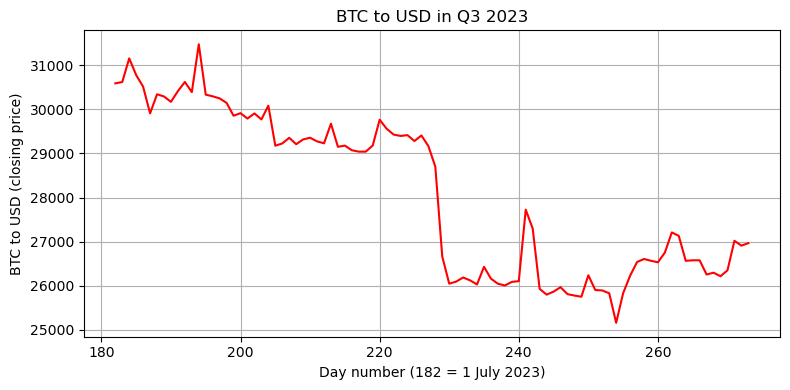

In [6]:
# Q4 – plot of Q3 2023 BTC–USD closing prices

# day numbers for Q3 (with 182 denoting 1 July).
days_q3 = np.arange(q3_start, q3_end + 1)

plt.figure(figsize=(8, 4))
plt.plot(days_q3, q3_rates, "-", linewidth=1.5, color="red")
plt.xlabel("Day number (182 = 1 July 2023)")
plt.ylabel("BTC to USD (closing price)")
plt.title("BTC to USD in Q3 2023")
plt.grid(True)
plt.tight_layout()
plt.show()

---
## Q4: Q3 price evolution discussion

From the Q3 2023 plot, the BTC USD prices show a perspicuous pattern across the quarter. The quarter begins at a higher price level, but with the plot , a powerful downward movement appears immature on , on with several short fluctuations . In the middle of the quarter , the plot shows a perspicuous topical bottom where the price reaches its minimal point for Q3 . After this dip, the prices rise again, but the recovery is only partial because the end of quarter values remain lower than the prices at the beginning of July. Overall, the plot indicates powerful volatility during Q3, a sharp mid quarter drop , and a modest rebound toward the end of September.

In [8]:
# Q5 – day numbers of lowest and highest prices in Q3 2023

# indices (within Q3) of the min and max prices
idx_min_q3 = np.argmin(q3_rates)
idx_max_q3 = np.argmax(q3_rates)

# convert back to original day numbers (with 182 denoting 1 July)
lowest_day = days_q3[idx_min_q3]
highest_day = days_q3[idx_max_q3]

lowest_price = q3_rates[idx_min_q3]
highest_price = q3_rates[idx_max_q3]

print(f"Lowest price was on day {lowest_day} ({lowest_price:.2f}).")
print(f"Highest price was on day {highest_day} ({highest_price:.2f}).")

Lowest price was on day 254 (25162.65).
Highest price was on day 194 (31476.05).
